In [1]:
"""
The aim of this script is to create the proof of concept plots for MYH6, CLN3 genes (Fig. 2A-B). 
The data for this is created by One_Gene_Model_POC.ipynb script.
"""

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def case_example(gene_name, disease_tissue):
    
    path = os.path.join('..', '..', 'Results', 'One_Gene_Examples', gene_name + '_Predictions_Example.csv')
    Example_data = pd.read_csv(path)
    print(Example_data)
    tissues = list(Example_data)[22:]
    print(tissues)
    pathogenic_probability_list = []
    Example_data['Variant'] = Example_data['Pos'].astype(str)   + '_' +  Example_data['Type']#Example_data['#Chr']
    tissue_dict = {'brain': 'Brain', 'Heart - Left Ventricle': 'Heart', 'kidney': 'Kidney', 'Lung':'Lung', 'Testis': 'Testis', 'Whole Blood': 'Blood'}
    for tissue in tissues:
        tissue_prob = Example_data[tissue].copy()
        tissue_prob = pd.concat([Example_data[['Pos', 'Variant']], tissue_prob], axis=1)

        tissue_prob['Tissue'] = tissue_dict[tissue]
        tissue_prob = tissue_prob.rename(columns={tissue: 'Pathogenic Score'})
        pathogenic_probability_list.append(tissue_prob)



    Pathogenic_Prob = pd.concat(pathogenic_probability_list)
    Pathogenic_Prob = Pathogenic_Prob.sort_values('Variant')
    print(tissues)
    order = ['Blood', 'Brain', 'Heart', 'Kidney','Lung', 'Testis']
    palette = [ 'gray',  'blue', 'red', 'green', 'orange', 'plum', 'lightseagreen']

    sns.catplot( x="Variant", y="Pathogenic Score", hue="Tissue", data=Pathogenic_Prob, kind="strip", height=3, aspect=4, hue_order=order, s=7, palette = 'Dark2')#, palette = 'Set1')#'husl''husl'

    Example_data = Example_data.sort_values('Pos', ignore_index=True)
    print(Example_data)
    patogenic_indexes = Example_data[Example_data[disease_tissue] == True].index
    print(patogenic_indexes)
    for ind in patogenic_indexes:
        print(ind)
        plt.gca().get_xticklabels()[ind].set_color("red")

    plt.subplots_adjust(left=0.1, bottom=0.4, right=0.8, top=0.8, wspace=0, hspace=0)
    plt.xticks(fontsize=5, rotation=90)
    plt.tick_params(labelsize=8)
    plt.suptitle(gene_name)

    path = os.path.join('..', '..', 'Results', 'One_Gene_Examples', gene_name + '_Predictions_Example.pdf')

    plt.savefig(path)

    plt.show()

    Unnamed: 0  VariationID  #Chr       Pos Ref Alt Type  Length  \
0         9661         3556    16  28493821   C   T  SNV       0   
1         9662        56249    16  28502823   C   T  SNV       0   
2         9663        56269    16  28498813  AC   A  DEL       1   
3         9664        56287    16  28497722   G  GA  INS       1   
4         9665        56292    16  28493665   G  GT  INS       1   
5         9666       100719    16  28498985   G  GA  INS       1   
6        14720       559021    16  28489219   T  TA  INS       1   
7        14721       136781    16  28493535   G   C  SNV       0   
8        14722       136787    16  28499079   G   A  SNV       0   
9        14723       136791    16  28495311   G   T  SNV       0   
10       14724       205089    16  28495457   G   T  SNV       0   
11       14725       205091    16  28503160   C   A  SNV       0   
12       14726       380253    16  28489045   G   A  SNV       0   
13       14727       673187    16  28489253   G 

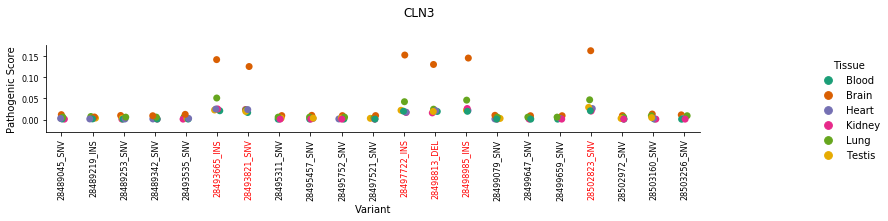

In [3]:
gene_name = 'CLN3'
disease_tissue = 'brain_disease_causing'

case_example(gene_name, disease_tissue)

    Unnamed: 0  VariationID  #Chr       Pos Ref Alt Type  Length  \
0        11300        14148    14  23863503   A   T  SNV       0   
1        11301        14150    14  23863473   G   A  SNV       0   
2        11302       217832    14  23862178   T  TG  INS       1   
3        36763       258708    14  23876216   G   A  SNV       0   
4        36764       258714    14  23853629   T   C  SNV       0   
5        36765       258713    14  23854272   T   C  SNV       0   
6        36766       258712    14  23855478   C   G  SNV       0   
7        36767       258711    14  23855849   C   T  SNV       0   
8        36768       258710    14  23856896   A   G  SNV       0   
9        36769       258709    14  23865885   G   A  SNV       0   
10       36770       258707    14  23866713   A   G  SNV       0   
11       36771       258706    14  23868285   G   A  SNV       0   
12       36772       389970    14  23866155   G   T  SNV       0   
13       36773       509757    14  23873489   G 

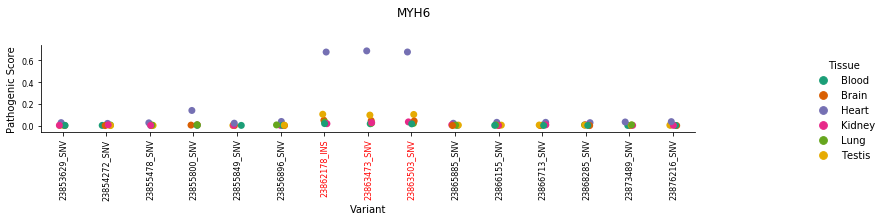

In [4]:
gene_name = 'MYH6'
disease_tissue = 'Heart - Left Ventricle_disease_causing'

case_example(gene_name, disease_tissue)